# Exercise 20

- Using the networkx `Graph` class and assocated methods developed in the class, solve the following exercise questions.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

### 20.1
Inspect the the "Zachary Karate Club" dataset from `karate.txt` file (in the `material` folder). What type of dataset is it?

In [5]:
!head material/karate.txt
#If this throws an error, try using !type instead of !head (although !type prints the whole file).
#You might also have to switch out the \ for a /.

0 31
0 21
0 19
0 17
0 13
0 12
0 11
0 10
0 8
0 7


### 20.2
- Make a function to load a file and return a `Graph` object, **without using `nx.from_edgelist()`**. Make node names `integers` and not `strings`.
- Load `karate.txt` into a `Graph` `G1`.
Hint: `G.add_edge(v1, v2)` adds the nodes `v1` and `v2` to the graph if they do not already exist.

In [25]:
def from_edgelist(filepath):
    G = nx.Graph()
    with open(filepath, "r") as f:
        for lines in f:
            node1, node2 = lines.strip().split(' ')
            G.add_edge(int(node1), int(node2))
    return G

G1 = from_edgelist("material/karate.txt") #You might have to switch out / for \.
print(f'Number of Nodes: {len(G1.nodes())}')
print(f'Nodes: {G1.nodes()}\n')

print(f'Number of Edges: {len(G1.edges())}')
print(f'Edges: {G1.edges()}')

Number of Nodes: 34
Nodes: [0, 31, 21, 19, 17, 13, 12, 11, 10, 8, 7, 6, 5, 4, 3, 2, 1, 30, 32, 28, 27, 9, 16, 33, 14, 15, 18, 20, 22, 23, 29, 25, 24, 26]

Number of Edges: 78
Edges: [(0, 31), (0, 21), (0, 19), (0, 17), (0, 13), (0, 12), (0, 11), (0, 10), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (31, 24), (31, 25), (31, 28), (31, 33), (31, 32), (21, 1), (19, 1), (19, 33), (17, 1), (13, 1), (13, 2), (13, 3), (13, 33), (12, 3), (10, 4), (10, 5), (8, 2), (8, 33), (8, 32), (8, 30), (7, 1), (7, 2), (7, 3), (6, 4), (6, 5), (6, 16), (5, 16), (3, 1), (3, 2), (2, 1), (2, 32), (2, 28), (2, 27), (2, 9), (1, 30), (30, 33), (30, 32), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (32, 29), (32, 33), (28, 33), (27, 23), (27, 24), (27, 33), (9, 33), (33, 14), (33, 15), (33, 18), (33, 20), (33, 22), (33, 23), (33, 26), (33, 29), (23, 29), (23, 25), (29, 26), (25, 24)]


The following line should return `True` if your code is correct:

In [26]:
sorted(G1.nodes()) == list(range(34))

True

### 20.3
Similarly, load the following five different graphs and store them as separate graphs; `G3`, `G_AB`, `G_D1`, `G_D2` and `G_ER`.

``` ["graph3.txt", "graphAB.txt", "graphDense1.txt", "graphDense2.txt", "graphER.txt"]```

(You may use a one-line list comprehension for this, if you like)

In [65]:
L = ["graph3.txt", "graphAB.txt", "graphDense1.txt", "graphDense2.txt", "graphER.txt"]

graph_list = [from_edgelist("material/" + i) for i in L]
name_list = ['G3', 'G_AB', 'G_D1', 'G_ER', 'G_ER']

### 20.4
Calculate the following for each of the 5 graphs :
- Number of nodes 
- Number of edges
- Average degree (rounded to 2 decimals)
- Diameter (longest shortest path)

Then plot the following for each of the 5 graphs:
- Degree distribution
- Shortest path distribution

Note: To ease your workload, make it into a function, as you will use it ahain in **20.5**.

*Hints: `nx.diameter`, `nx.shortest_path`, `nx.has_path`*

In [149]:
def calculate_stats(names, graphs):

    print('Graph\t#Nodes\t#Edges\tAverage Degree\tDiameter')
    # make calculations
    for i, graph in enumerate(graphs):
        num_nodes = len(graph.nodes())
        num_edges = len(graph.edges())

        avg_degree = round(num_edges*2/num_nodes, 2) 

        # diameter is the longest shortest path in a graph
        diameter = nx.diameter(graph)
        
        # print out report
        print(f'{str(names[i])}\t{num_nodes}\t{num_edges}\t{avg_degree}\t\t{diameter}')
    
    print('\nShowing Degree Distribution and Shortes Path Distribution...')

    # create figure with two subplots
    fig, ax = plt.subplots(2, len(graphs), figsize=(30,15))

    # plot for each graph
    for i, graph in enumerate(zip(names, graphs)):
        # get all possible degrees 
        degrees = [item[1] for item in graph[1].degree()]
    
        # plot the degree distribution
        ax[0][i].hist(degrees, density=True) 
        ax[0][i].set_title(f'Degree Distribution for {graph[0]}')
        ax[0][i].set_xlabel('Degrees')
        ax[0][i].set_xlim(min(degrees), max(degrees), 1)

        shortest_paths = [nx.shortest_path_length(graph[1], v1, v2) for v1 in graph[1].nodes() for v2 in graph[1].nodes() if nx.has_path(graph[1], v1, v2)]
        #print(shortest_paths)

        ax[1][i].hist(shortest_paths, density=True)
        ax[1][i].set_title(f'Shortest Path Distribution for {graph[0]}')
        ax[1][i].set_xlabel('Shortest Paths')

    ax[0][0].set_ylabel('Frequency')
    ax[1][0].set_ylabel('Frequency')


Graph	#Nodes	#Edges	Average Degree	Diameter
G3	34	34	2.0		11
G_AB	34	93	5.47		2
G_D1	33	78	4.73		4
G_ER	33	78	4.73		5
G_ER	34	561	33.0		1

Showing Degree Distribution and Shortes Path Distribution...


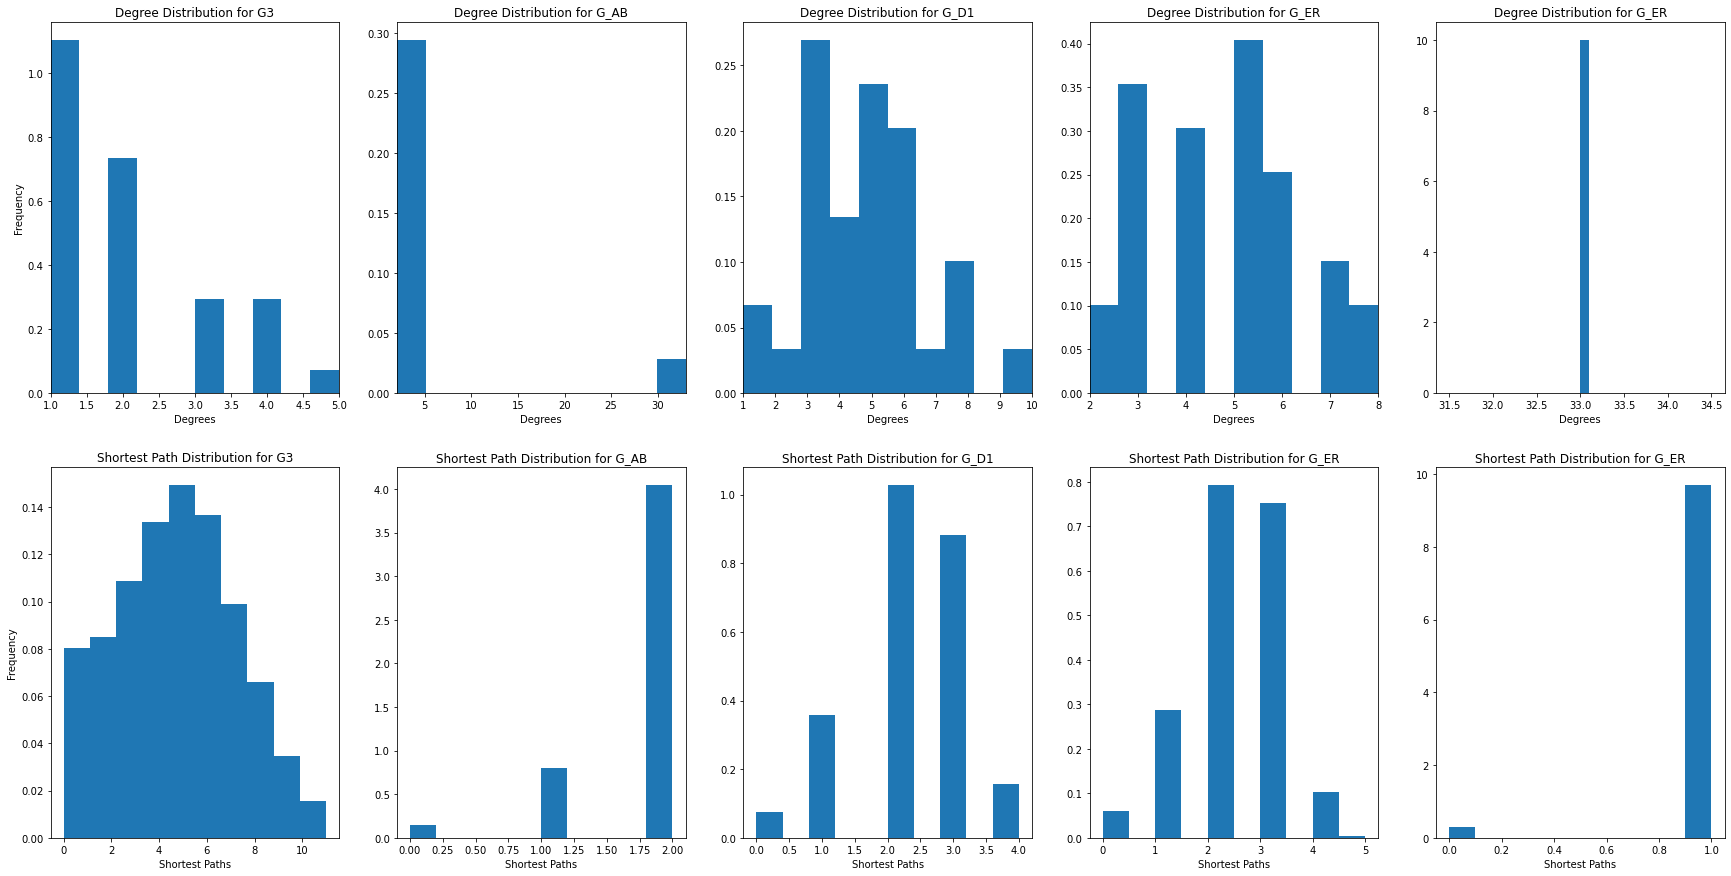

In [150]:
calculate_stats(name_list, graph_list)

### 20.5
- Delete 5 edges randomly, from each of the 5 above graphs and recalculate the metrics from **20.4**.
- Do you see any major changes in any of the plots?
- What changes do you imagine are made when removing edges in a graph? What are the consequences of this?

Note that deleting edges might make your Graph disconnected (in which case a path will not exist between all pairs of nodes and thus it will not have a diameter. As a bonus exercise, you may see if you can fix this. You may use try-except statements in this part.)

In [ ]:
random.seed(42)
#Your code here

### 20.6a
- Create a function that, given a graph, returns the number of "triangles" (cliques of size 3) in the graph. **Do not use the triangles method from networkx**.
- For each of the 5 original graphs (before deletion of edges), identify the number of triangles from the Graphs.

In [ ]:
#Your code here

### 20.6b
For testing, compare your output with that of the `nx.triangles` method.
- Note: Divide the output by 3 because each triangle is counted thrice - once for each node in it.

An example code and output is given for your convenience. Feel free to use it (or write your own using `nx.triangles`):
```graphs = [G3, G_AB, G_D1, G_D2, G_ER]
[sum(nx.triangles(graph).values())//3 for graph in graphs]```

Output: `[0, 88, 19, 13, 5984]`

In [ ]:
#Your test code here

# Bonus Questions

### 20.B1 (Advanced)
Create a function to calculate the diameter of a graph.
- The function should return -1 if the graph is disconnected.
- Do not use the `nx.diameter`.
- For an extra challenge, use as few of the following as possible:
 - `nx.shortest_path` (or `nx.shortest_path_length` etc.)
 - `nx.connected_components` (or variants hereof)
 - other methods that might make this seem too easy *(can you do it with just the basic Graph object and iteration/recursion?)*

In [ ]:
#Your code here